In [5]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 

import pickle

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
sns.set_style('ticks')
#Load data from script
fn_in = './experiments/nodepert4_fixedw_exact/summary/2_establish_convergence_feedforward_output.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']

In [13]:
print(metrics.shape)
tags

(5, 10, 501, 8)


['loss',
 'acc',
 'loss_test',
 'acc_test',
 'align_B2',
 'norm_W2_B2',
 'align_B3',
 'norm_W3_B3']

## Make plots

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


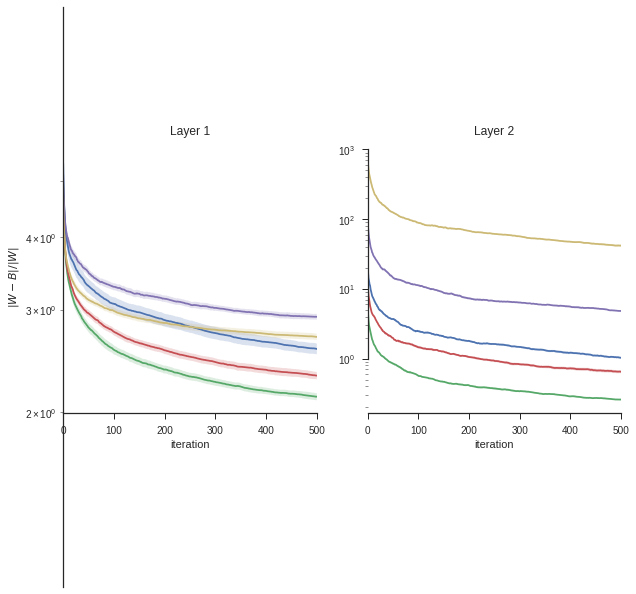

In [36]:
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1, 10]
N = 5

idx = 5
fig,axes = plt.subplots(1,2,figsize=(10,5))
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('$\|W-B\|/\|W\|$');
axes[0].set_title('Layer 1');
axes[0].set_yscale('log')

idx = 7
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
axes[1].set_yscale('log')
sns.despine(trim=True)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


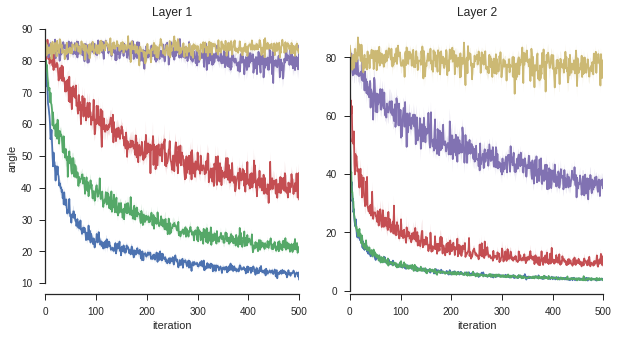

In [38]:
#Plot alignment
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1, 10]
N = 5

idx = 4
fig,axes = plt.subplots(1,2,figsize=(10,5))
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('angle');
axes[0].set_title('Layer 1');

idx = 6
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
sns.despine(trim=True)